# This python code tries to find out the probability of clicking an Ad in the partner website leading to a potential item purchase

In [ ]:
import pandas as pd
import numpy as np
import gc
train=pd.read_csv("/content/drive/My Drive/train/train.csv")
view_log=pd.read_csv("/content/drive/My Drive/train/view_log.csv")
item_data=pd.read_csv("/content/drive/My Drive/train/item_data.csv")
test=pd.read_csv("/content/drive/My Drive/test/test.csv")

In [0]:
print(view_log.columns)
print(view_log.isnull().sum())
print("=====================")
print(item_data.columns)
print(item_data.isnull().sum())
print("=====================")
print(train.columns)
print(train.isnull().sum())
print("=====================")

print(len(np.intersect1d(train["user_id"],view_log["user_id"])))
print(len(np.intersect1d(test["user_id"],view_log["user_id"])))
print(len(np.intersect1d(train["user_id"],test["user_id"])))


Index(['server_time', 'device_type', 'session_id', 'user_id', 'item_id'], dtype='object')
server_time    0
device_type    0
session_id     0
user_id        0
item_id        0
dtype: int64
Index(['item_id', 'item_price', 'category_1', 'category_2', 'category_3',
       'product_type'],
      dtype='object')
item_id         0
item_price      0
category_1      0
category_2      0
category_3      0
product_type    0
dtype: int64
Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'is_click'],
      dtype='object')
impression_id      0
impression_time    0
user_id            0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64
74723
34079
19645


0    226747
1     10862
Name: is_click, dtype: int64


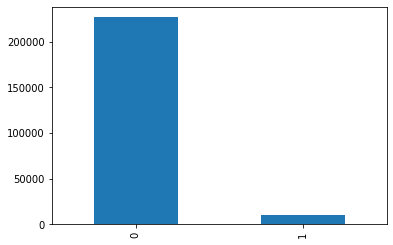

In [0]:
import matplotlib.pyplot as plt
print(train["is_click"].value_counts())
train["is_click"].value_counts().plot(kind="bar")

0         15
1         15
2         15
3         15
4         15
          ..
237604    13
237605    13
237606    13
237607    13
237608    13
Name: impression_time, Length: 237609, dtype: int64


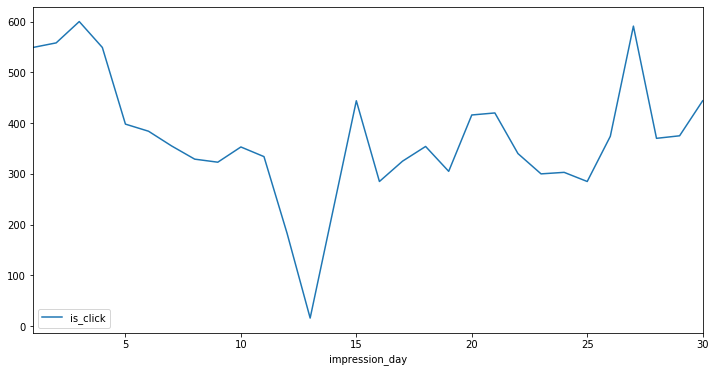

In [0]:
train["impression_time"]=pd.to_datetime(train["impression_time"],format="%Y-%m-%d %H:%M:%S")
print(train["impression_time"].apply(lambda x: x.day))
train["impression_day"]=train["impression_time"].apply(lambda x: x.day)
train.groupby(["impression_day"]).agg({"is_click":"sum"}).plot(figsize=(12,6))
train.drop(columns=["impression_day"],inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


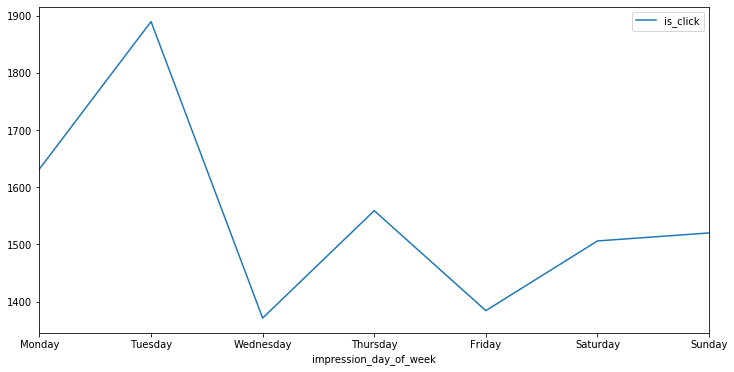

In [0]:
train["impression_day_of_week"]=train["impression_time"].apply(lambda x: x.weekday_name)
cats=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
train.groupby(["impression_day_of_week"]).agg({"is_click":"sum"}).reindex(cats).plot(figsize=(12,6))
train.drop(columns=["impression_day_of_week"],inplace=True, axis=1)

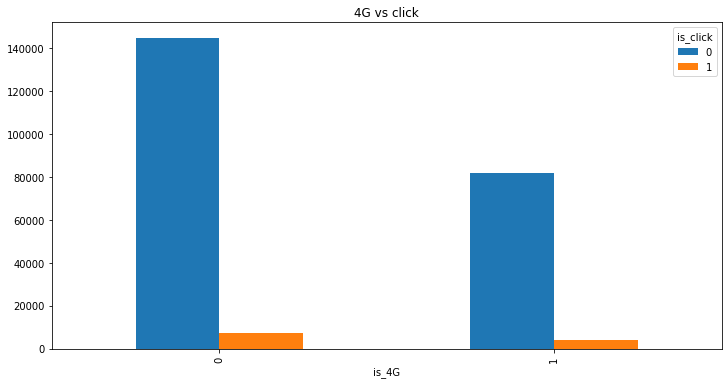

In [0]:
train.groupby(["is_4G","is_click"]).size().unstack().plot(figsize=(12,6),kind="bar",title="4G vs click")

# Data Engineering

In [0]:
item_data_pd=pd.get_dummies(item_data,columns=["category_1","category_2"])
print(item_data_pd.columns)
print(item_data_pd.count())

Index(['item_id', 'item_price', 'category_3', 'product_type', 'category_1_0',
       'category_1_1', 'category_1_2', 'category_1_4', 'category_1_5',
       'category_1_6', 'category_1_7', 'category_1_8', 'category_1_9',
       'category_1_10', 'category_1_11', 'category_1_12', 'category_1_13',
       'category_1_14', 'category_1_15', 'category_1_16', 'category_1_17',
       'category_2_0', 'category_2_1', 'category_2_2', 'category_2_3',
       'category_2_4', 'category_2_5', 'category_2_6', 'category_2_7',
       'category_2_8', 'category_2_9', 'category_2_10', 'category_2_11',
       'category_2_12', 'category_2_13', 'category_2_14', 'category_2_15',
       'category_2_16', 'category_2_17', 'category_2_18', 'category_2_19',
       'category_2_20', 'category_2_21', 'category_2_22', 'category_2_23',
       'category_2_24', 'category_2_25', 'category_2_26', 'category_2_27',
       'category_2_28', 'category_2_29', 'category_2_30', 'category_2_31',
       'category_2_33', 'category_2_34',

In [0]:
view_log_item_data_pd=view_log.merge(item_data_pd, how="left", on="item_id" )
view_log_item_data_pd.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_3,product_type,category_1_0,category_1_1,category_1_2,category_1_4,category_1_5,category_1_6,category_1_7,category_1_8,category_1_9,category_1_10,category_1_11,category_1_12,category_1_13,category_1_14,category_1_15,category_1_16,category_1_17,category_2_0,category_2_1,category_2_2,category_2_3,category_2_4,category_2_5,category_2_6,category_2_7,category_2_8,category_2_9,category_2_10,category_2_11,category_2_12,category_2_13,category_2_14,...,category_2_40,category_2_41,category_2_42,category_2_43,category_2_44,category_2_45,category_2_46,category_2_47,category_2_48,category_2_49,category_2_50,category_2_51,category_2_52,category_2_53,category_2_54,category_2_55,category_2_56,category_2_57,category_2_58,category_2_59,category_2_60,category_2_61,category_2_62,category_2_63,category_2_64,category_2_65,category_2_66,category_2_67,category_2_68,category_2_69,category_2_70,category_2_71,category_2_72,category_2_73,category_2_74,category_2_75,category_2_76,category_2_77,category_2_78,category_2_79
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,253.0,3184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,228.0,545.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-10-15 08:58:00,android,573960,23628,128855,4544.0,62.0,5609.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-10-15 08:58:00,android,121691,2430,12774,904.0,252.0,2740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-10-15 08:58:00,android,218564,19227,28296,2304.0,54.0,7422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
del item_data
del item_data_pd
import gc
gc.collect()
print(view_log_item_data_pd.shape)


(3118622, 104)


In [0]:
view_log_item_data_pd.sort_values(["user_id","session_id"],inplace=True, ascending=True)
view_log_item_data_pd["session_id_cumc1"]=view_log_item_data_pd.groupby(["user_id","session_id"])["session_id"].cumcount()+1

view_log_item_data_pd.sort_values(["user_id","session_id","item_id"],inplace=True, ascending=True)
view_log_item_data_pd["session_id_cumc2"]=view_log_item_data_pd.groupby(["user_id","session_id","item_id"])["session_id"].cumcount()+1

view_log_item_data_pd.drop(columns="server_time",inplace=True, axis=1)

In [0]:
cat_agg=["count","nunique"]
num_agg=["min","mean","max","sum"]
agg_col={"device_type": cat_agg,
         "session_id":cat_agg,
         "item_id":cat_agg,
         "item_price":num_agg,
         "category_3":["count","nunique","mean"],
         "product_type":["count","nunique","mean"]}

for k in view_log_item_data_pd.columns:
  if k.startswith("category_1") or k.startswith("category_2"):
    agg_col[k]=["sum","mean"]
  elif k.startswith("session_id_cumc"):
    agg_col[k]=num_agg

print(agg_col)


{'device_type': ['count', 'nunique'], 'session_id': ['count', 'nunique'], 'item_id': ['count', 'nunique'], 'item_price': ['min', 'mean', 'max', 'sum'], 'category_3': ['count', 'nunique', 'mean'], 'product_type': ['count', 'nunique', 'mean'], 'category_1_0': ['sum', 'mean'], 'category_1_1': ['sum', 'mean'], 'category_1_2': ['sum', 'mean'], 'category_1_4': ['sum', 'mean'], 'category_1_5': ['sum', 'mean'], 'category_1_6': ['sum', 'mean'], 'category_1_7': ['sum', 'mean'], 'category_1_8': ['sum', 'mean'], 'category_1_9': ['sum', 'mean'], 'category_1_10': ['sum', 'mean'], 'category_1_11': ['sum', 'mean'], 'category_1_12': ['sum', 'mean'], 'category_1_13': ['sum', 'mean'], 'category_1_14': ['sum', 'mean'], 'category_1_15': ['sum', 'mean'], 'category_1_16': ['sum', 'mean'], 'category_1_17': ['sum', 'mean'], 'category_2_0': ['sum', 'mean'], 'category_2_1': ['sum', 'mean'], 'category_2_2': ['sum', 'mean'], 'category_2_3': ['sum', 'mean'], 'category_2_4': ['sum', 'mean'], 'category_2_5': ['sum', 

In [0]:
view_log_item_data_pd_agg=view_log_item_data_pd.groupby("user_id").agg(agg_col)
view_log_item_data_pd_agg.columns=["A_"+"_".join(i).strip() for i in view_log_item_data_pd_agg.columns.values]
view_log_item_data_pd_agg.reset_index(inplace=True)
print(view_log_item_data_pd_agg.head())

   user_id  A_device_type_count  ...  A_session_id_cumc2_max  A_session_id_cumc2_sum
0        0                   42  ...                       6                      71
1        1                    8  ...                       1                       8
2        2                  165  ...                       4                     177
3        3                    8  ...                       3                      15
4        4                    2  ...                       1                       2

[5 rows x 217 columns]


In [0]:
pd.set_option("display.max_columns",200)

In [0]:
df_combined=pd.concat([train,test],axis=0, ignore_index=True)
print(train.shape, test.shape, df_combined.shape)

(237609, 7) (90675, 6) (328284, 7)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328284 entries, 0 to 328283
Data columns (total 7 columns):
app_code           328284 non-null int64
impression_id      328284 non-null object
impression_time    328284 non-null object
is_4G              328284 non-null int64
is_click           237609 non-null float64
os_version         328284 non-null object
user_id            328284 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 17.5+ MB
None


In [0]:
df_combined=pd.get_dummies(df_combined, columns=["os_version"])
print(df_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328284 entries, 0 to 328283
Data columns (total 9 columns):
app_code                   328284 non-null int64
impression_id              328284 non-null object
impression_time            328284 non-null object
is_4G                      328284 non-null int64
is_click                   237609 non-null float64
user_id                    328284 non-null int64
os_version_intermediate    328284 non-null uint8
os_version_latest          328284 non-null uint8
os_version_old             328284 non-null uint8
dtypes: float64(1), int64(3), object(2), uint8(3)
memory usage: 16.0+ MB
None


In [0]:
df_combined.sort_values(["user_id","impression_time"],inplace=True)
df_combined.drop("impression_time",axis=1,inplace=True)
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328284 entries, 104312 to 281401
Data columns (total 8 columns):
app_code                   328284 non-null int64
impression_id              328284 non-null object
is_4G                      328284 non-null int64
is_click                   237609 non-null float64
user_id                    328284 non-null int64
os_version_intermediate    328284 non-null uint8
os_version_latest          328284 non-null uint8
os_version_old             328284 non-null uint8
dtypes: float64(1), int64(3), object(1), uint8(3)
memory usage: 16.0+ MB
None


In [0]:
agg_col={"impression_id":["count"]}
print(agg_col)
print(df_combined.columns)
df_combined_imp_id=df_combined.groupby("user_id").agg(agg_col)
#print(df_combined_imp_id[df_combined_imp_id.index==71457])
#df_combined_imp_id.reset_index(inplace=True)
#print(df_combined_imp_id[df_combined_imp_id.user_id==71457])
df_combined_imp_id.columns=["A_"+"_".join(x).strip() for x in df_combined_imp_id.columns.values]
df_combined_imp_id.reset_index(inplace=True)
print(df_combined_imp_id[df_combined_imp_id.user_id==71457])

{'impression_id': ['count']}
Index(['app_code', 'impression_id', 'is_4G', 'is_click', 'user_id',
       'os_version_intermediate', 'os_version_latest', 'os_version_old'],
      dtype='object')
       user_id  A_impression_id_count
68788    71457                    100


In [0]:
#print(df_combined[(df_combined["user_id"]==71457) ])
#print((df_combined[df_combined.index==309363] ))
#print(len(view_log_item_data_pd_agg[view_log_item_data_pd_agg["A_user_id_"]==71457]))
#print(view_log_item_data_pd_agg.columns)
df_combined=df_combined.merge(df_combined_imp_id, how="left", on="user_id" )
print(df_combined[df_combined.user_id==71457])



        app_code  ... A_impression_id_count
252072       467  ...                   100
252073       467  ...                   100
252074       467  ...                   100
252075       467  ...                   100
252076       467  ...                   100
...          ...  ...                   ...
252167       467  ...                   100
252168       467  ...                   100
252169       467  ...                   100
252170       467  ...                   100
252171       467  ...                   100

[100 rows x 9 columns]


In [0]:
#view_log_item_data_pd_agg.rename(columns={"A_user_id_":"user_id"},inplace=True)
df_combined.drop(columns=["impression_id"],inplace=True, axis=1)
df_combined_final=df_combined.merge(view_log_item_data_pd_agg, how="left", on="user_id")


In [0]:
print(df_combined_final.shape)
print(len(df_combined_final[df_combined_final.is_click.isnull()==False]))
print(len(df_combined_final[df_combined_final.is_click.isnull()==True]))
print(df_combined_final.head())

(328284, 224)
237609
90675
   app_code  is_4G  ...  A_session_id_cumc2_max  A_session_id_cumc2_sum
0       207      0  ...                       6                      71
1       386      1  ...                       1                       8
2       190      0  ...                       4                     177
3       190      0  ...                       4                     177
4       190      0  ...                       4                     177

[5 rows x 224 columns]


In [0]:
train_final=df_combined_final[df_combined_final.is_click.isnull()==False].copy()
test_final=df_combined_final[df_combined_final.is_click.isnull()==True].copy()
print(train_final.shape, test_final.shape)

(237609, 224) (90675, 224)


In [0]:
#test_final.drop(columns=["is_click"],inplace=True)
#test_final.drop(columns=["Unnamed: 0"],inplace=True)
#X,y=train_final.drop(columns=["is_click"], axis=1),train_final["is_click"]
print(train_final.shape, test_final.shape)
print(len(train_final[train_final.is_click.isnull()==False]))
y=train_final["is_click"]
print(y.shape)
X=train_final.drop(columns=["is_click"], axis=1)
print(X.shape)
test_final.drop(columns=["is_click"],inplace=True)
print(test_final.shape)


(237609, 224) (90675, 224)
237609
(237609,)
(237609, 223)
(90675, 223)


In [0]:
print(y.head())

0    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: is_click, dtype: float64


In [0]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

y_predproba=[]

lgbmclass=LGBMClassifier(learning_rate=0.03,max_depth=20, random_state=1975,objective="binary")
Skfold= StratifiedKFold(n_splits=10,shuffle=True,random_state=1975)

for train_index, test_index in Skfold.split(X,y):
  X_train, X_test=X.iloc[train_index],X.iloc[test_index]
  y_train,y_test=y.iloc[train_index],y.iloc[test_index]
  
  lgbmclass.fit(X_train,y_train, eval_set=[(X_test,y_test)], eval_metric="auc",early_stopping_rounds=200)
  preds=lgbmclass.predict_proba(test_final)[:,-1]
  y_predproba.append(preds)
  


[1]	valid_0's binary_logloss: 0.185195	valid_0's auc: 0.684111
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.184612	valid_0's auc: 0.684257
[3]	valid_0's binary_logloss: 0.184064	valid_0's auc: 0.688425
[4]	valid_0's binary_logloss: 0.183517	valid_0's auc: 0.692167
[5]	valid_0's binary_logloss: 0.18306	valid_0's auc: 0.692808
[6]	valid_0's binary_logloss: 0.182611	valid_0's auc: 0.69448
[7]	valid_0's binary_logloss: 0.182224	valid_0's auc: 0.695356
[8]	valid_0's binary_logloss: 0.181776	valid_0's auc: 0.696477
[9]	valid_0's binary_logloss: 0.181403	valid_0's auc: 0.696997
[10]	valid_0's binary_logloss: 0.181018	valid_0's auc: 0.697755
[11]	valid_0's binary_logloss: 0.180662	valid_0's auc: 0.698843
[12]	valid_0's binary_logloss: 0.180345	valid_0's auc: 0.69927
[13]	valid_0's binary_logloss: 0.180057	valid_0's auc: 0.700569
[14]	valid_0's binary_logloss: 0.179754	valid_0's auc: 0.701305
[15]	valid_0's binary_logloss: 0.179497	valid_0's auc

In [0]:
lgbm_mean= np.mean(y_predproba,0)
print(lgbm_mean[:100])

[0.01497899 0.01605258 0.01605258 0.01617237 0.04639193 0.01667148
 0.01667148 0.03191678 0.03191678 0.01177358 0.01326468 0.01326468
 0.03562258 0.03562258 0.01469692 0.04900648 0.01293328 0.01968163
 0.01968163 0.01363764 0.01363764 0.07166069 0.04588557 0.04380931
 0.04588557 0.07456305 0.023343   0.03980571 0.01731876 0.02176019
 0.06940395 0.01177777 0.04278652 0.02065051 0.02065051 0.02065051
 0.02065051 0.02065051 0.03981391 0.03981391 0.03981391 0.03981391
 0.06436619 0.06436619 0.06436619 0.06436619 0.0204236  0.01872723
 0.07091462 0.05745125 0.05745125 0.05745125 0.02144069 0.02144069
 0.02144069 0.02144069 0.02144069 0.06044549 0.06044549 0.06044549
 0.06044549 0.06044549 0.06044549 0.06044549 0.06044549 0.06044549
 0.06044549 0.01456326 0.01456326 0.05794791 0.05794791 0.03966856
 0.04066278 0.03969024 0.04084833 0.02444459 0.02444459 0.02444459
 0.02444459 0.02892814 0.01370685 0.01370685 0.01370685 0.01370685
 0.01370685 0.01370685 0.01370685 0.01370685 0.01370685 0.0119

In [0]:
X_train['is_4G']=X_train['is_4G'].astype('category')
X_train['app_code']=X_train['app_code'].astype('category')
X_train['user_id']=X_train['user_id'].astype("category")
categorical_features_indices=np.where(X_train.dtypes=="category")[0]
print(categorical_features_indices)

[0 1 2]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
!pip install -q catboost

     |████████████████████████████████| 62.9MB 117kB/s 


In [0]:
y_predproba_cb=[]

from catboost import CatBoostClassifier
catclass=CatBoostClassifier(learning_rate=0.03,depth=10, random_state=1975,eval_metric="AUC")

for train_index, test_index in Skfold.split(X,y):
  X_train, X_test=X.iloc[train_index],X.iloc[test_index]
  y_train,y_test=y.iloc[train_index],y.iloc[test_index]
  catclass.fit(X_train,y_train, eval_set=[(X_test,y_test)], early_stopping_rounds=100, cat_features=categorical_features_indices)
  preds=lgbmclass.predict_proba(test_final)[:,-1]
  y_predproba_cb.append(preds)

0:	test: 0.5535391	best: 0.5535391 (0)	total: 1.25s	remaining: 20m 44s
1:	test: 0.5539470	best: 0.5539470 (1)	total: 2.46s	remaining: 20m 25s
2:	test: 0.5551473	best: 0.5551473 (2)	total: 3.72s	remaining: 20m 36s
3:	test: 0.5676594	best: 0.5676594 (3)	total: 4.69s	remaining: 19m 26s
4:	test: 0.5746952	best: 0.5746952 (4)	total: 5.91s	remaining: 19m 37s
5:	test: 0.5767070	best: 0.5767070 (5)	total: 7.13s	remaining: 19m 42s
6:	test: 0.5764423	best: 0.5767070 (5)	total: 7.68s	remaining: 18m 9s
7:	test: 0.5761645	best: 0.5767070 (5)	total: 8.87s	remaining: 18m 20s
8:	test: 0.5757630	best: 0.5767070 (5)	total: 10.1s	remaining: 18m 29s
9:	test: 0.5784532	best: 0.5784532 (9)	total: 11.2s	remaining: 18m 32s
10:	test: 0.6252446	best: 0.6252446 (10)	total: 12.4s	remaining: 18m 38s
11:	test: 0.6476220	best: 0.6476220 (11)	total: 13.7s	remaining: 18m 51s
12:	test: 0.6446177	best: 0.6476220 (11)	total: 15s	remaining: 18m 57s
13:	test: 0.6590129	best: 0.6590129 (13)	total: 16.2s	remaining: 19m 3s
14

KeyboardInterrupt: ignored

In [0]:
cat_mean= np.mean(y_predproba_cb,0)